# Decision Tree

A **Decision Tree** is a supervised machine learning algorithm used for both classification and regression tasks. It splits the dataset into subsets based on feature values, forming a tree-like structure where:

- Each **internal node** represents a decision on a feature.
- Each **branch** represents the outcome of that decision.
- Each **leaf node** represents a class label (for classification) or a value (for regression).

The tree grows by selecting the best features that split the data most effectively, using metrics like **Gini Impurity** or **Entropy** to evaluate the quality of a split.

---

## Gini Impurity

**Gini Impurity** measures the probability of incorrectly classifying a randomly chosen element from the dataset if it was randomly labeled according to the distribution of labels in the subset.

### Formula:

$Gini\ Impurity = 1 - \sum_{i=1}^{n} (p_i)^2$

Where:
- \( p_i \) is the probability of class \( i \)
- \( n \) is the number of classes

### Characteristics:
- Ranges between 0 (perfect purity) and 0.5 (for binary classification with equal distribution).
- Lower Gini implies a better split.

---

## Entropy

**Entropy** measures the amount of disorder or impurity in the dataset. It comes from information theory and quantifies the unpredictability of the class label.

### Formula:

$Entropy = - \sum_{i=1}^{n} p_i \log_2(p_i)$

Where:
- \( p_i \) is the probability of class \( i \)
- \( n \) is the number of classes

### Characteristics:
- Ranges from 0 (pure node) to \(\log_2(n)\) (maximum impurity).
- Used in the **ID3** algorithm for splitting nodes.

---

## Comparison

| Metric        | Range       | Interpretation            | Used In     |
|---------------|-------------|----------------------------|-------------|
| Gini Impurity | 0 to 0.5    | Probability of misclassification | CART        |
| Entropy       | 0 to log₂(n)| Measure of uncertainty     | ID3, C4.5   |

Both metrics help in selecting the best feature to split on by minimizing impurity or entropy in the resulting child nodes.



In [12]:
import pandas as pd

df = pd.read_csv("D:\\utils\\DataSets\\salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [13]:
df.degree.unique()  # unique values in the degree column

array(['bachelors', 'masters'], dtype=object)

In [14]:
df['degree_number'] = df.degree.map({'bachelors':1, 'masters': 2})
df.head(3)

,company,job,degree,salary_more_then_100k,degree_number
0,google,sales executive,bachelors,0,1
1,google,sales executive,masters,0,2
2,google,business manager,bachelors,1,1


In [15]:
df.drop('degree', axis="columns", inplace=True)
df.head(3)

,company,job,salary_more_then_100k,degree_number
0,google,sales executive,0,1
1,google,sales executive,0,2
2,google,business manager,1,1


In [16]:
df_encoded = pd.get_dummies(df, columns=['company', 'job'], drop_first=True)
df_encoded.head()

,salary_more_then_100k,degree_number,company_facebook,company_google,job_computer programmer,job_sales executive
0,0,1,False,True,False,True
1,0,2,False,True,False,True
2,1,1,False,True,False,False
3,1,2,False,True,False,False
4,0,1,False,True,True,False


In [17]:
from sklearn.tree import DecisionTreeClassifier

X = df_encoded.drop('salary_more_then_100k', axis="columns")
y = df_encoded['salary_more_then_100k']

model = DecisionTreeClassifier(criterion="gini")
model.fit(X, y)

y_pred = model.predict(X)

from sklearn.metrics import classification_report

report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



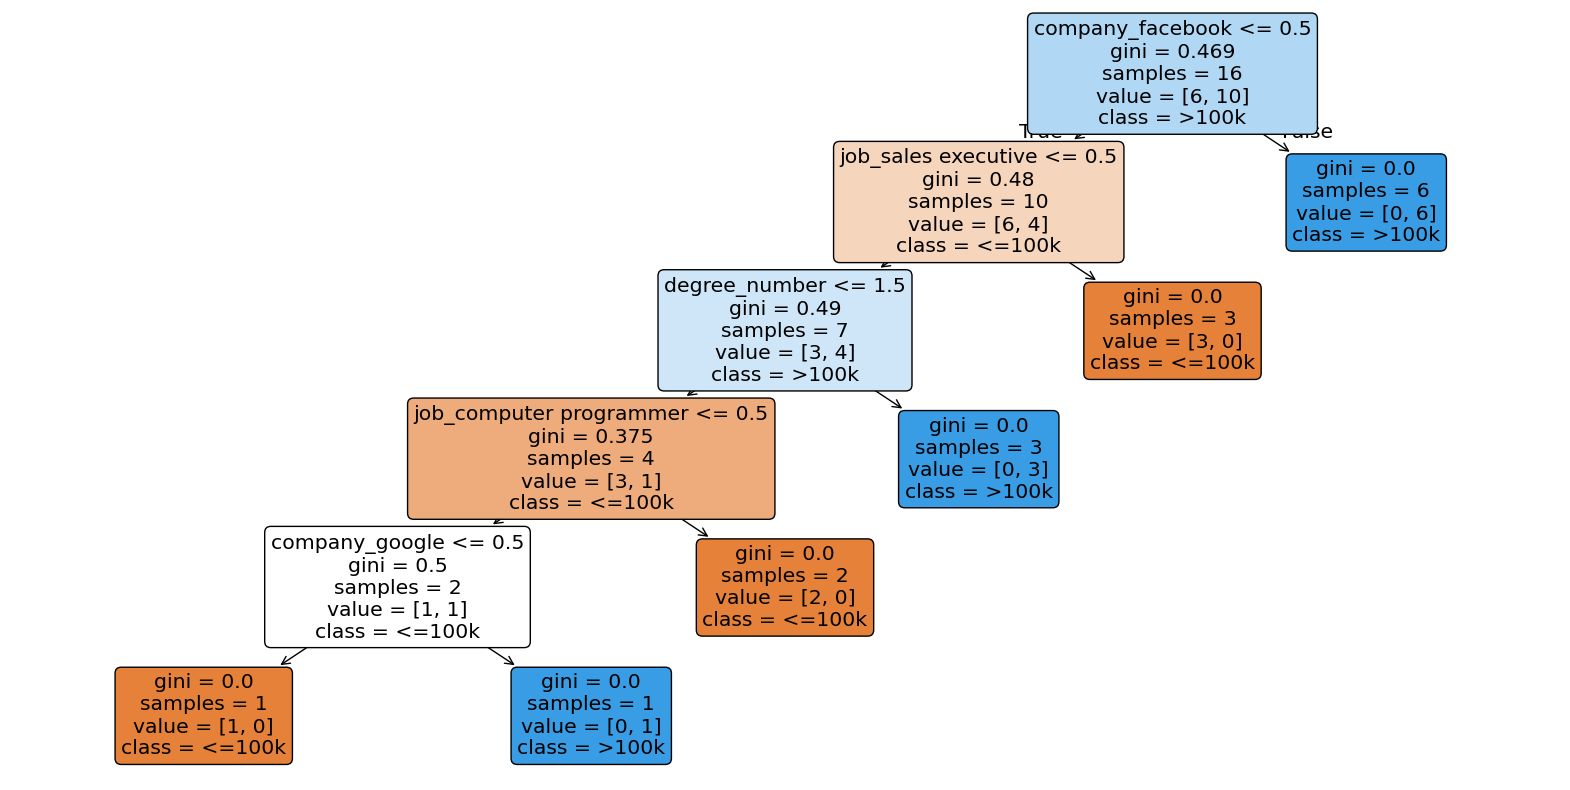

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))  # Adjust size to make it more readable
plot_tree(model, 
          feature_names=X.columns, 
          class_names=['<=100k', '>100k'], 
          filled=True, 
          rounded=True)
plt.show()


In [18]:
# Optionally, visualize the tree
from sklearn.tree import export_text
print(export_text(model, feature_names=list(X.columns)))

|--- company_facebook <= 0.50
|   |--- job_sales executive <= 0.50
|   |   |--- degree_number <= 1.50
|   |   |   |--- job_computer programmer <= 0.50
|   |   |   |   |--- company_google <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- company_google >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- job_computer programmer >  0.50
|   |   |   |   |--- class: 0
|   |   |--- degree_number >  1.50
|   |   |   |--- class: 1
|   |--- job_sales executive >  0.50
|   |   |--- class: 0
|--- company_facebook >  0.50
|   |--- class: 1



In [20]:
from sklearn.tree import DecisionTreeClassifier

X = df_encoded.drop('salary_more_then_100k', axis="columns")
y = df_encoded['salary_more_then_100k']

model = DecisionTreeClassifier(criterion="entropy")
model.fit(X, y)

y_pred = model.predict(X)

from sklearn.metrics import classification_report

report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



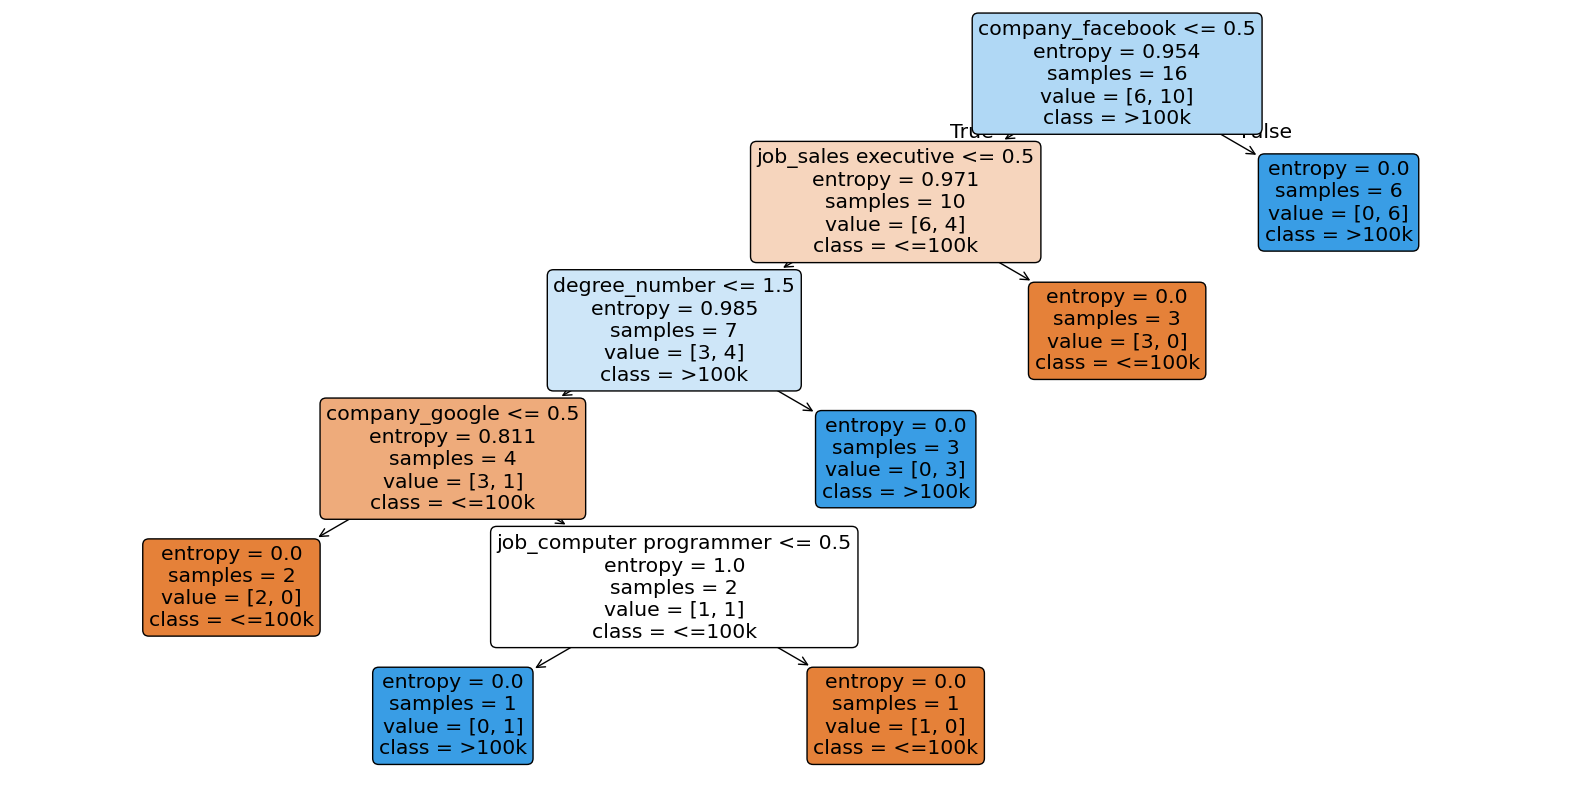

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))  # Adjust size to make it more readable
plot_tree(model, 
          feature_names=X.columns, 
          class_names=['<=100k', '>100k'], 
          filled=True, 
          rounded=True)
plt.show()


In [22]:
# Optionally, visualize the tree
from sklearn.tree import export_text
print(export_text(model, feature_names=list(X.columns)))

|--- company_facebook <= 0.50
|   |--- job_sales executive <= 0.50
|   |   |--- degree_number <= 1.50
|   |   |   |--- company_google <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- company_google >  0.50
|   |   |   |   |--- job_computer programmer <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- job_computer programmer >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- degree_number >  1.50
|   |   |   |--- class: 1
|   |--- job_sales executive >  0.50
|   |   |--- class: 0
|--- company_facebook >  0.50
|   |--- class: 1

